In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.cluster import AgglomerativeClustering, KMeans

# Loading the Dataset

In [17]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
         'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
         'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, names=names)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Preprocessing

In [18]:
data.replace(' ?', np.nan, inplace=True)
data.dropna(inplace=True)
data['income'] = data['income'].map({' <=50K': 0, ' >50K': 1})
data.drop(['fnlwgt', 'education'], axis=1, inplace=True)

In [20]:
cat_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])
data.head()    

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,13,2,3,0,4,1,0,0,13,38,0
2,38,2,9,0,5,1,4,1,0,0,40,38,0
3,53,2,7,2,5,0,2,1,0,0,40,38,0
4,28,2,13,2,9,5,2,0,0,0,40,4,0


In [23]:
# Feature Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('income', axis=1))
data_scaled

array([[ 0.04279571,  2.93600035,  1.12891838, ..., -0.21858598,
        -0.07773411,  0.26492394],
       [ 0.88028814,  1.88768202,  1.12891838, ..., -0.21858598,
        -2.3315307 ,  0.26492394],
       [-0.03333996, -0.20895464, -0.4397382 , ..., -0.21858598,
        -0.07773411,  0.26492394],
       ...,
       [ 1.48937355, -0.20895464, -0.4397382 , ..., -0.21858598,
        -0.07773411,  0.26492394],
       [-1.25151078, -0.20895464, -0.4397382 , ..., -0.21858598,
        -1.74721307,  0.26492394],
       [ 1.0325595 ,  0.83936369, -0.4397382 , ..., -0.21858598,
        -0.07773411,  0.26492394]])

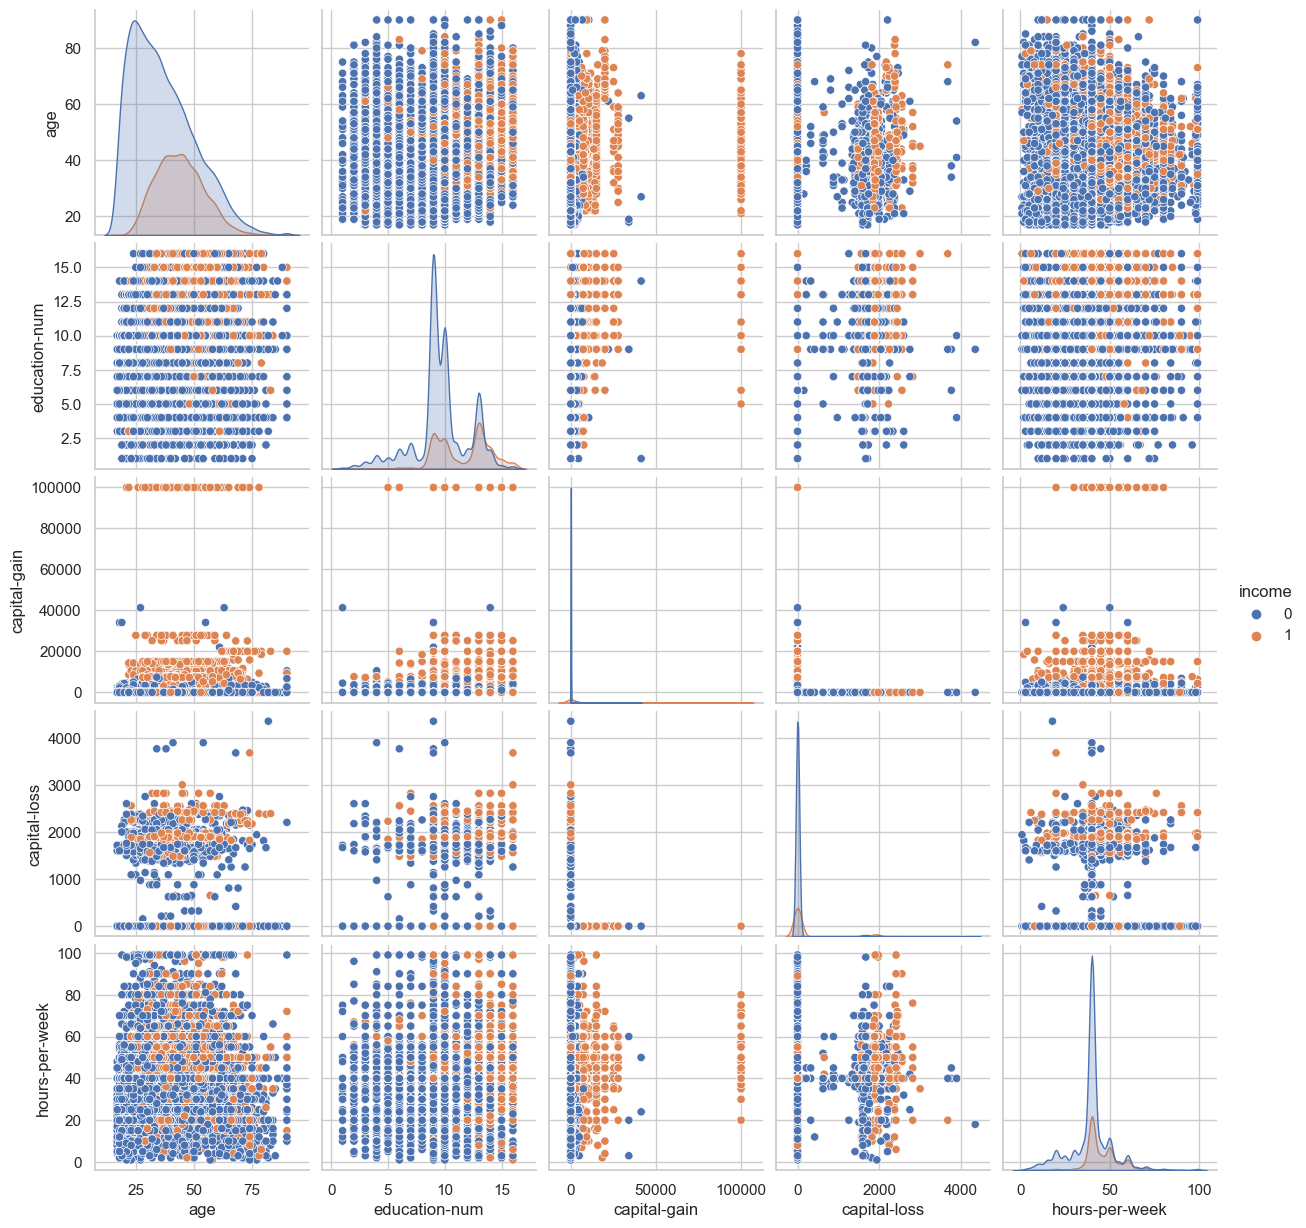

In [25]:
sns.set(style="whitegrid")
sns.pairplot(data[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']], hue="income")
plt.show()

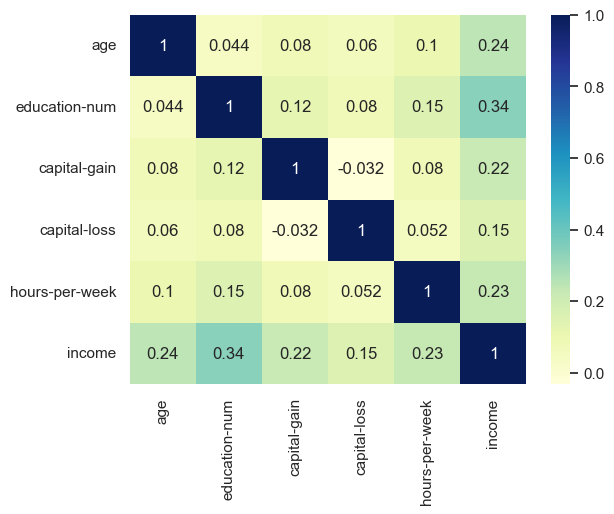

In [26]:
corr = data[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

# Splitting the Dataset into Train and Test Sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data['income'], test_size=0.3, random_state=42)

# Classification Analysis

In [28]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_cm = confusion_matrix(y_test, dt_pred)

Confusion Matrix for Decision Tree Classifier:
[[6486  281]
 [1128 1154]]


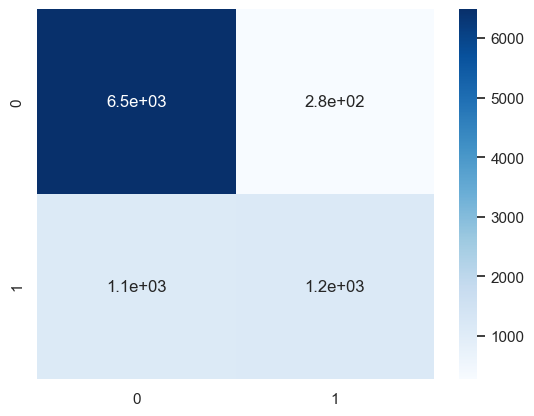

In [29]:
print("Confusion Matrix for Decision Tree Classifier:")
print(dt_cm)
sns.heatmap(dt_cm, annot=True, cmap="Blues")
plt.show()

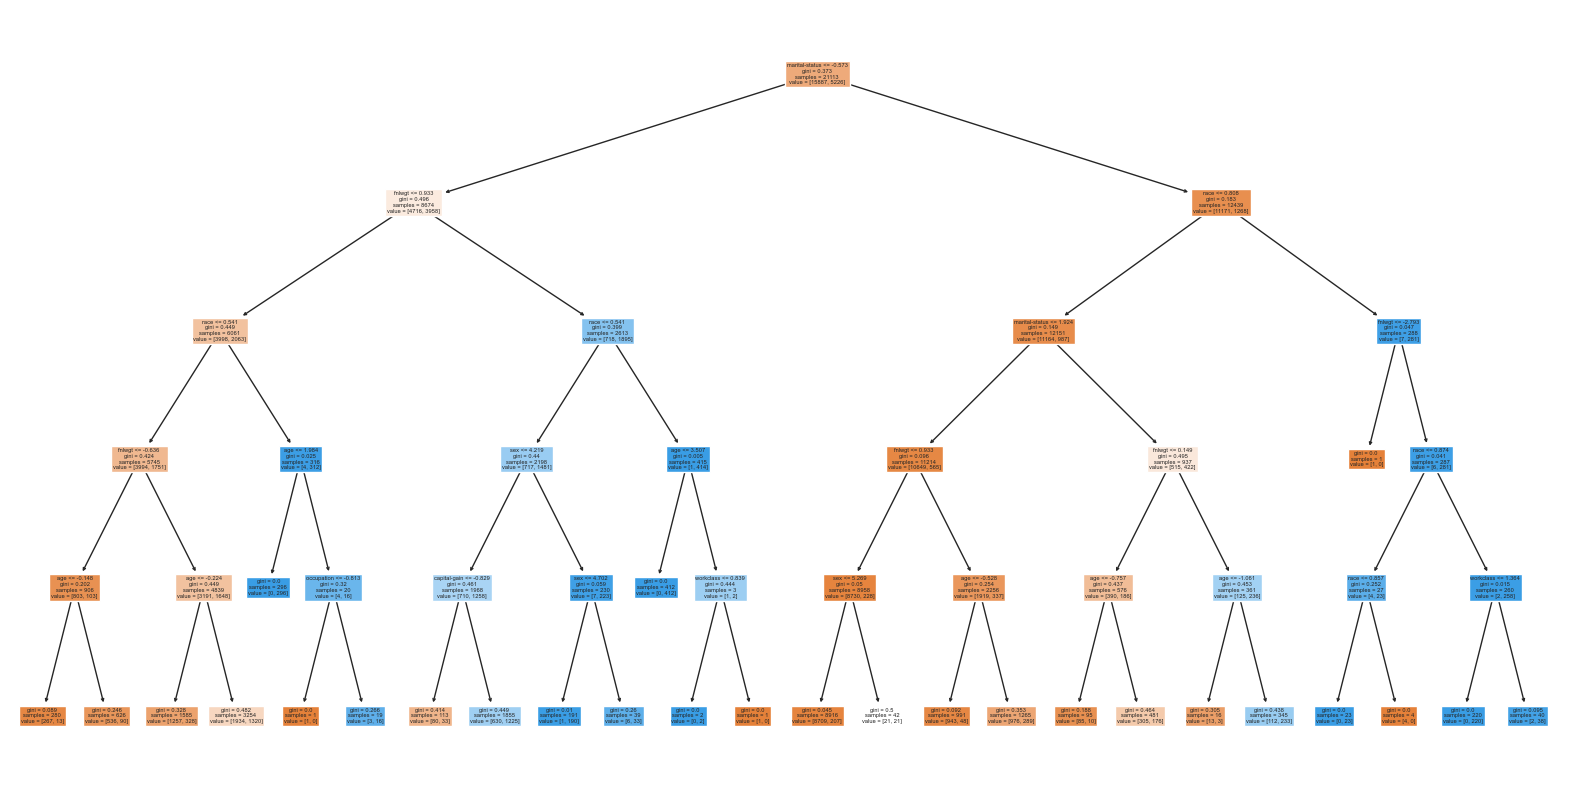

In [30]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_clf, filled=True, feature_names=names)
plt.show()

c:\Users\ESHAN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1200x800 with 0 Axes>

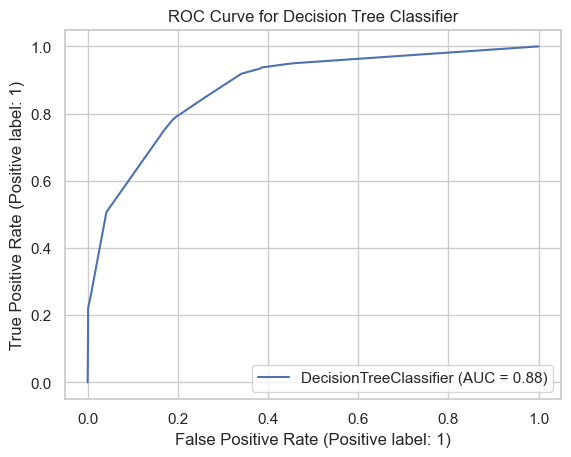

In [31]:
from sklearn.metrics import plot_roc_curve

# ROC Curve for Decision Tree Classifier
plt.figure(figsize=(12, 8))
plot_roc_curve(dt_clf, X_test, y_test)
plt.title("ROC Curve for Decision Tree Classifier")
plt.show()

In [32]:
# Logistic Regression Classifier
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_cm = confusion_matrix(y_test, lr_pred)

Confusion Matrix for Logistic Regression Classifier:
[[6372  395]
 [1244 1038]]


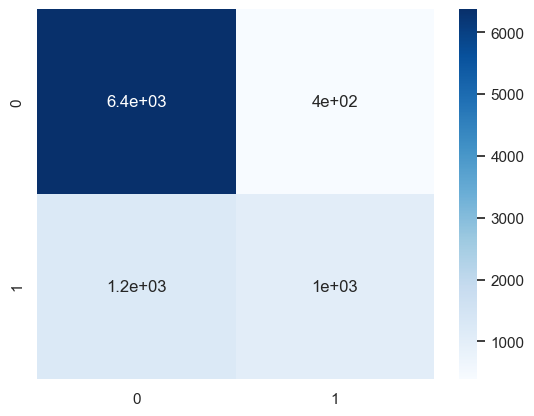

In [33]:
print("Confusion Matrix for Logistic Regression Classifier:")
print(lr_cm)
sns.heatmap(lr_cm, annot=True, cmap="Blues")
plt.show()

c:\Users\ESHAN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1200x800 with 0 Axes>

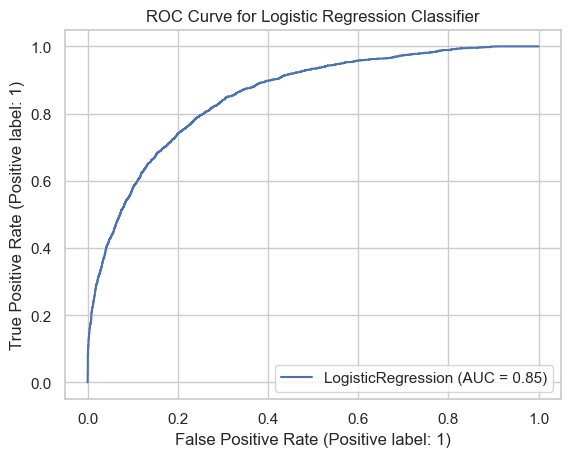

In [34]:

# ROC Curve for Logistic Regression Classifier
plt.figure(figsize=(12, 8))
plot_roc_curve(lr_clf, X_test, y_test)
plt.title("ROC Curve for Logistic Regression Classifier")
plt.show()

Clustering Analysis


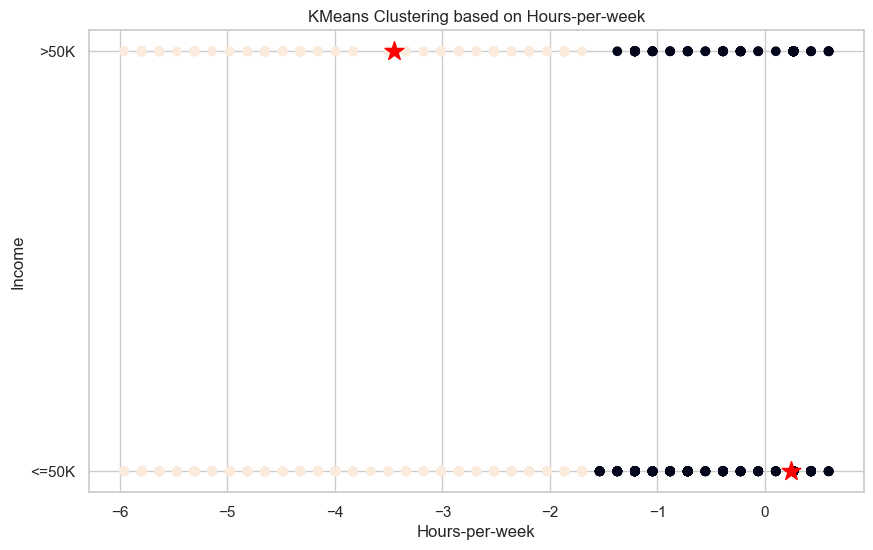

In [44]:
# KMeans Clustering Based on Hours-per-week
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train[:,[11]])

# Visualizing the Clusters with Centroids
plt.figure(figsize=(10,6))
plt.scatter(X_train[:,11], y_train, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], [0,1], s=200, marker='*', c='red')
plt.title('KMeans Clustering based on Hours-per-week')
plt.xlabel('Hours-per-week')
plt.ylabel('Income')
plt.yticks([0,1], ['<=50K', '>50K'])
plt.show()

In [47]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_train[:,[11]], kmeans.labels_)

print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.949775206326528


In [49]:
# Clustering Analysis
# Agglomerative Clustering
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
ac.fit(data_scaled)
data['cluster_ac'] = ac.labels_

In [51]:
silhouette_avg = silhouette_score(data_scaled, ac.labels_)

print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.10376232288448126


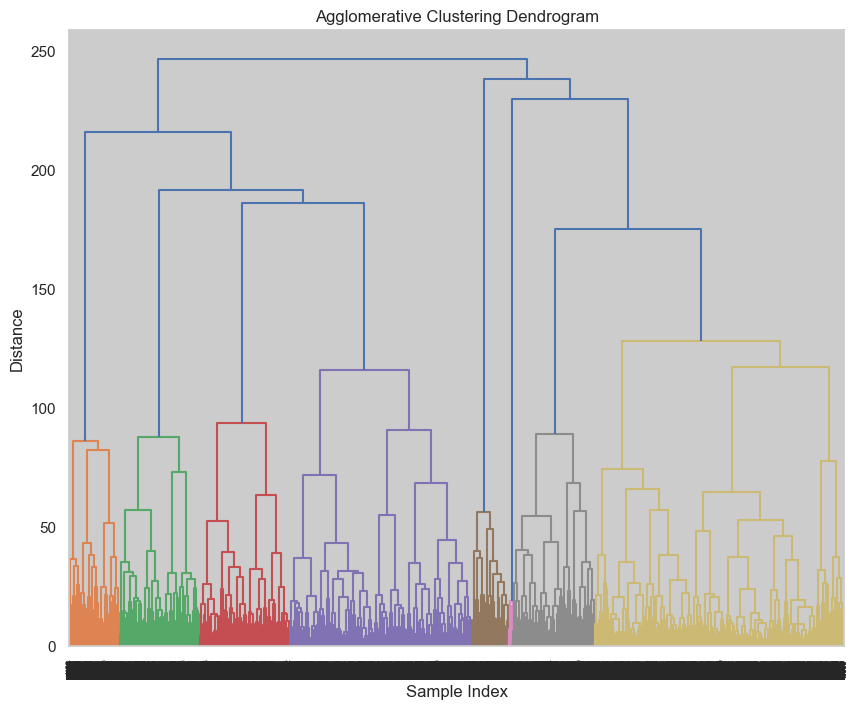

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10,8))
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
linkage_matrix = linkage(data_scaled, 'ward')
dendrogram(linkage_matrix)
plt.show()